In [2]:
import pandas as pd
import joblib
import numpy as np
import os
import re
from wordcloud import WordCloud
from torchnlp.encoders.text import WhitespaceEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split

/home/codespace/.python/current/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
lyrics =pd.read_csv('https://raw.githubusercontent.com/tashapiro/predicting-song-music-genre/main/data/lyrics_processed.csv')

In [5]:
lyrics.sample(5)

,id,track,artist,lyrics,genre,cleaned_lyrics,title_length,lines,sections,verse_count,chorus_count,dash_count,words,unique_words,track_lower,lyrics_lower
2213,0kHwTHf8ye0mSd66pwcrEN,How You Like Me Now,The Heavy,[Verse 1]\nNow there was a time\nWhen you love...,rock,Now there was a time When you loved me so I c...,19,57,5,2,0,0,237,81,how you like me now,now there was a time when you loved me so i c...
757,4OxXBAN51tjVBEjSwuWWbv,U.N.I.T.Y.,Queen Latifah,"[Intro]\nUh, U.N.I.T.Y., U.N.I.T.Y. that's a u...",hip_hop,"Uh, U.N.I.T.Y., U.N.I.T.Y. that's a unity U.N...",10,98,4,3,0,0,844,307,u.n.i.t.y.,"uh, u.n.i.t.y., u.n.i.t.y. that's a unity u.n..."
2554,3lfLAToNl2Ibcuo9U6UTSd,Upside Down,A*Teens,[Intro]\nUp... side down\nUpside down\nUpside ...,dance_pop,Up... side down Upside down Upside down My ...,11,66,8,2,3,0,258,110,upside down,up... side down upside down upside down my ...
1745,3NyovXfcpc8PDWWKH7xEDs,S.O.S. (Sawed Off Shotgun),The Glorious Sons,"[Verse 1]\nMother, I don't wanna take my medic...",rock,"Mother, I don't wanna take my medicine 24 yea...",26,77,7,4,2,0,335,92,s.o.s.,"mother, i don't wanna take my medicine 24 yea..."
3353,7kswSnEiwuwuOQngMvpflV,Close Your Eyes,Felix Jaehn,"[Verse]\nClose your eyes, make a wish\nWhen li...",dance_pop,"Close your eyes, make a wish When life ain't ...",15,66,6,4,4,0,376,58,close your eyes,"close your eyes, make a wish when life ain't ..."


In [6]:
#remove punctuation, convert to all lowercase
lyrics['final_lyrics'] = lyrics['cleaned_lyrics'].map(lambda x : re.sub('[\(\),\.!?-]', '', x))
lyrics['final_lyrics'] = lyrics['final_lyrics'].map(lambda x: x.lower())


In [7]:
lyrics['final_lyrics']


0        every time our eyes meet this feeling inside ...
1        when the sun goes down on my side of town tha...
2        it was seven hundred fence posts from your pl...
3       kelsea ballerini  dibs dolly parton  jolene cl...
4        something 'bout the way she’s wearing her dre...
                              ...                        
3415     where do we go now i don't know innocence ove...
3416     ooh yeah any thing that you want me do i'll d...
3417     last night i couldn't even get an answer answ...
3418     can you see me 'cause i'm right here can you ...
3419     now and then i get a little too drunk say a l...
Name: final_lyrics, Length: 3420, dtype: object

In [8]:
# Select genre and lyrics
df = lyrics.loc[:,['genre','final_lyrics']]
df.sample(5)

,genre,final_lyrics
2251,rock,out of here we're out of here out of heartach...
1410,hip_hop,i know y'all niggas ain't fucking with me c...
161,country,i saw your picture in a paper honeymoon in ja...
2741,dance_pop,hell down heaven now livin' in the same town ...
824,hip_hop,where brooklyn at where brooklyn at where bro...


In [9]:
# split train/test
xtrain, xtest, ytrain, ytest = train_test_split(df['final_lyrics'], df['genre'], test_size=0.2, random_state=42)

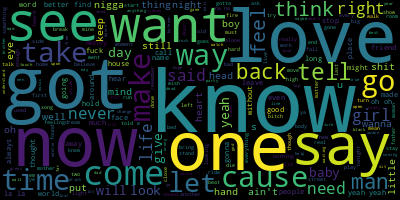

In [10]:
# make wordcloud to get a visual representation of most common words 
long_string = ','.join(list(df['final_lyrics'].values))
wordcloud = WordCloud(background_color="Black", max_words=1000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [47]:
df['genre'].unique()

array(['country', 'hip_hop', 'rock', 'dance_pop'], dtype=object)

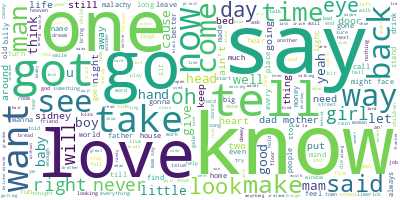

In [55]:
# common word in country
country = df.loc[df['genre'] == 'country',:]
long_string = ','.join(list(country['final_lyrics'].values))
wordcloud = WordCloud(background_color="White", max_words=1000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

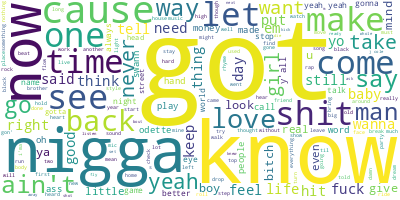

In [56]:
# common word in hip_hop
hip_hop = df.loc[df['genre'] == 'hip_hop',:]
long_string = ','.join(list(hip_hop['final_lyrics'].values))
wordcloud = WordCloud(background_color="White", max_words=1000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

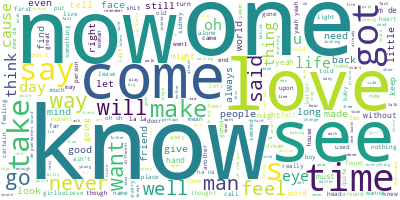

In [57]:
# common word in rock
rock = df.loc[df['genre'] == 'rock',:]
long_string = ','.join(list(rock['final_lyrics'].values))
wordcloud = WordCloud(background_color="White", max_words=1000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

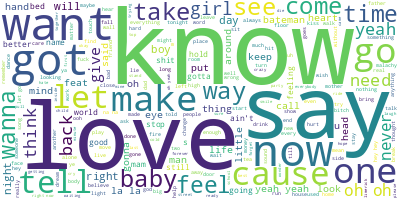

In [58]:
# common word in dance_pop
dance_pop = df.loc[df['genre'] == 'dance_pop',:]
long_string = ','.join(list(dance_pop['final_lyrics'].values))
wordcloud = WordCloud(background_color="White", max_words=1000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [11]:
with open("encoder.pickle", "rb") as f:
    encoder: WhitespaceEncoder = joblib.load(f)

In [12]:
# Convert a collection of text documents to a matrix of token counts using CountVectorizer
# fit into lda model
cv = CountVectorizer(vocabulary=encoder.token_to_index)
xtrain_matrix = cv.transform(xtrain)
xtest_matrix = cv.transform(xtest)
lda = LatentDirichletAllocation(n_components=4, random_state=42, n_jobs=-1)
lda.fit(xtrain_matrix)

LatentDirichletAllocation(n_components=4, n_jobs=-1, random_state=42)

In [14]:
#actually print top word per genre
top_k_per_genre = lda.components_.argsort(axis=1)[:, -50:]
for idx, genre in enumerate(top_k_per_genre):
    print("=" * 20 + f"Genre #{idx}" + "=" * 20)
    print(encoder.decode(genre[::-1]))
    print()

====================Genre #0====================
the to that in and was it which not for with you is be have my him on one me from would who this all they when or what we no de them there if more are like only could now time some see never know said people out our

====================Genre #1====================
the it you and my to on that in like me up we get your got with all for this is they yeah what just don out know be now when do cause no go let back shit make come if from ya man em yo some see girl fuck

====================Genre #2====================
the and to in you that is with on it for we me feat my says they have there be all are up from him out what la no if go your when don know us like was one man this or not get back will do dad god over

====================Genre #3====================
you me it to the and my love oh that don be your know we all in no yeah just what on do when baby is if wanna for want like this now never say time let go way feel cause with make 

In [18]:
#sample words from genre --- country
def sample_from_genre(genre_idx: int, n_samples: int):
    comp = lda.components_[genre_idx, :]
    comp = comp / comp.sum()

    return encoder.decode(
        np.random.choice(np.arange(encoder.vocab_size), p=comp, size=n_samples)
    )


[sample_from_genre(0,20) for _ in range(10)]

['that trying longest was finding parents moment there personality too street ask if was was used only was us the',
 'education to in you saying to said shocked pleased was experienced in with dear gentle the leaving we was see',
 'thought for suppose or came went was grief poodle what out later this sunny would to was which expected there',
 'friend people talk that told way worth your the to that no the the with me for me de mass',
 'say it certain it which made lifetime the remained music pleasant give way young lips attempt for the disgust alongside',
 'generation longer mind forward if based in watched or clock the from with you ever to feel not to de',
 'again them adverse the always with lay one it it playing the could they aspect to to him concert in',
 'which be certainly that like is to with know me would the suddenly in the start was will large most',
 'secrets the not resign some well imagination if liquid anger on in home interested when it aunt involved lower said',
 'the